(121,)

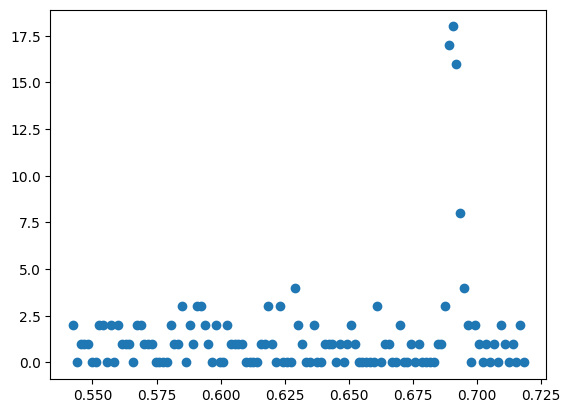

In [1]:
from fit import cmaes
import numpy as np
import os
import time
import matplotlib.pyplot as plt

data = np.load('/nobackup/nd276333/Workspace/cdsaxs/data/champs00_p112nm_num2_02.npy')

qys = data[:,0]
qzs = data[:,1]
intensity = data[:,2]

i = 100
l = 20
qys = qys[0:121]
qzs = qzs[0:121]
intensity = intensity[0:121]
plt.scatter(qzs, intensity)

np.shape(intensity)

# New Code

In [2]:
import cdsaxs
from cdsaxs.simulations.stacked_trapezoid import StackedTrapezoidSimulation

langles = np.asarray([31.97,80.44,69.50, 89.97, 86.63,58.07])
initial_params = {'heights': {'value': 4.24, 'variation': 1E-2},
                    # 'langles': {'value': langles, 'variation': 4E-1},
                    'rangles': {'value': langles, 'variation': 4E-2},
                    'y_start': {'value': 0, 'variation': 1E-2},
                    'bot_cd': {'value': 55.25, 'variation': 1E-2},
                    'dwx': {'value': 0.95, 'variation': 1E-4},
                    'dwz': {'value': 1.96, 'variation': 1E-4},
                    'i0': {'value': 0.07, 'variation': 1E-3},
                    'bkg_cste': {'value':2.14, 'variation': 1E-3}

                    }


from cdsaxs.fitter import Fitter
Simulation2 = StackedTrapezoidSimulation(use_gpu=False, qys=qys, qzs=qzs, initial_guess=initial_params)

Fitter1 = Fitter(Simulation=Simulation2, exp_data=intensity)


/nobackup/nd276333/emcee_env/lib/python3.11/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/nobackup/nd276333/emcee_env/lib/python3.11/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [3]:
bestfit, fitness = Fitter1.cmaes(sigma=100, ngen=2, popsize=10, mu=10, n_default=13, restarts=0, tolhistfun=10E-5, ftarget=None, restart_from_best=True, verbose=True)

Start CMAES
gen	nevals	avg 	std 	min 	max 	fin
1  	10    	None	None	None	None	0  
2  	10    	None	None	None	None	0  
Iteration terminated due to ngen criterion after 2 gens
('best', [-119.27516402551323, 16.60063170758686, -68.9704393961334, 18.45428794893623, -76.60524231613705, -174.44870814180942, -103.20401405559127, 77.86488625360069, -93.79184822648519, -5.905684840294949, 74.96450714240427, 232.7710198503357, 37.814540325667174], inf)


/nobackup/nd276333/Workspace/cdsaxs/src/cdsaxs/residual.py:127: RuntimeWarning: divide by zero encountered in log10
  error = self.xp.nansum(self.xp.abs((self.xp.log10(exp_i_array) - self.xp.log10(sim_i_array))), axis=1)
/nobackup/nd276333/Workspace/cdsaxs/src/cdsaxs/fitter.py:289: RuntimeWarning: invalid value encountered in scalar divide
  if(n_infs / fitness_arr.shape[0] > 0.5):


# Old Code

In [4]:
# Define initial parameters and multiples
dwx = 0.95
dwz = 1.96
i0 = 0.07
bkg = 2.14
height = 4.24
bot_cd = 55.25
swa = [31.97,80.44,69.50, 89.97, 86.63,58.07]

initial_guess = np.array([dwx, dwz, i0, bkg, height, bot_cd] + swa)
multiples = [1E-8, 1E-8, 1E-8, 1E-7, 1E-7, 1E-7] + len(swa) * [1E-5]

# Check if the number of initial guesses matches the number of multiples
assert len(initial_guess) == len(multiples), f'Number of adds ({len(initial_guess)}) is different from number of multiples ({len(multiples)})'

# Define data arrays
data = intensity

# Define a range of population sizes
# nbpop = np.arange(10, 700, 50)
nbpop = [10, 11]

best_corr, best_fitness = cmaes(data=data, qxs=qys, qzs=qzs, sigma=100, ngen=2, popsize=10, mu=10,
                                        n_default=len(initial_guess), restarts=0, verbose=True, tolhistfun=5e-5,
                                        initial_guess=initial_guess, ftarget=None, dir_save=None)
